#  Sampling & Likelihood Estimation

In [2]:
import sys
sys.path.append('..')
from tools.model import sample_run
from tools.tuning import get_run
from tools.constants import root_dir, full_data_path
from os.path import join
import pandas as pd

run_path=join(root_dir, 'tuning', 'N1000','N_1000_blocks_20.json')
info = get_run(run_path)

In [2]:
df_NF = sample_run(run_path)
f_name='BHBHm.pq'
df=pd.read_parquet(full_data_path)

tensor([[-171174.1719],
        [-216585.1406],
        [-237424.7812],
        ...,
        [-174204.2500],
        [-170980.4531],
        [-238358.3906]], grad_fn=<SumBackward1>)


In [3]:
from tools.tuning import data_masking

df_NF['Source']='NF'
M_max = 60
print('Mass > '+str(M_max)+' =',(len(data_masking(df_NF, 'Mass_0>'+str(M_max)))+len(data_masking(df_NF, 'Mass_1>'+str(M_max))))/len(df_NF), '%')
print('Mass < 0 =',(len(data_masking(df_NF, 'Mass_0<0'))+len(data_masking(df_NF, 'Mass_1<0')))/len(df_NF), '%')

df['Source'] = 'SEVN'

df_all=pd.concat([data_masking(df_NF, 'Mass_0<'+str(M_max)+':Mass_1<'+str(M_max)), df[:len(df_NF)]], ignore_index=True)

Mass > 60 = 0.0 %
Mass < 0 = 2.4968789013732834e-05 %


In [4]:
df_NF['Source']='NF'
M_max = 80
print('Mass > '+str(M_max)+' =',(len(data_masking(df_NF, 'Mass_0>'+str(M_max)))+len(data_masking(df_NF, 'Mass_1>'+str(M_max))))/len(df_NF), '%')
print('Mass < 0 =',(len(data_masking(df_NF, 'Mass_0<0'))+len(data_masking(df_NF, 'Mass_1<0')))/len(df_NF), '%')

df['Source'] = 'SEVN'

df_all=pd.concat([data_masking(df_NF, 'Mass_0<'+str(M_max)+':Mass_1<'+str(M_max)), df[:len(df_NF)]], ignore_index=True)

Mass > 80 = 0.0 %
Mass < 0 = 2.4968789013732834e-05 %


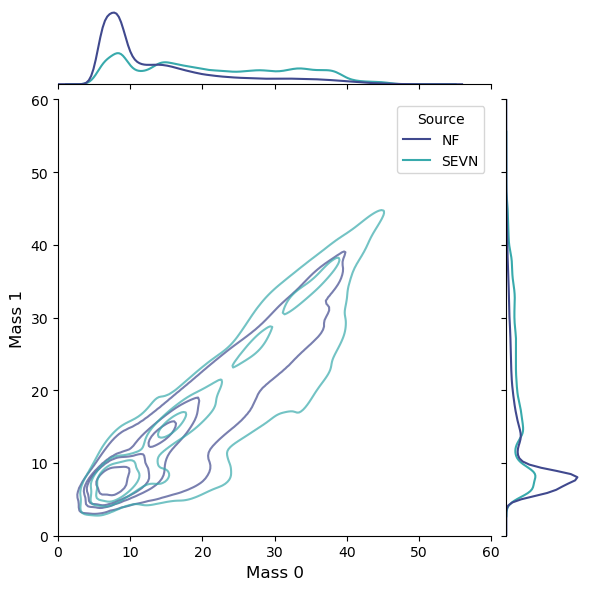

In [5]:
import seaborn as sns
g = sns.jointplot(
    data=df_all,
    x="Mass_0", y="Mass_1", hue='Source',palette = "mako",
    kind="kde",xlim= (0,60), ylim= (0,60), alpha =0.7, levels = [0.1,0.5,0.7,0.9])

g.set_axis_labels('Mass 0', 'Mass 1', fontsize=12)

### Plotting Likelihood

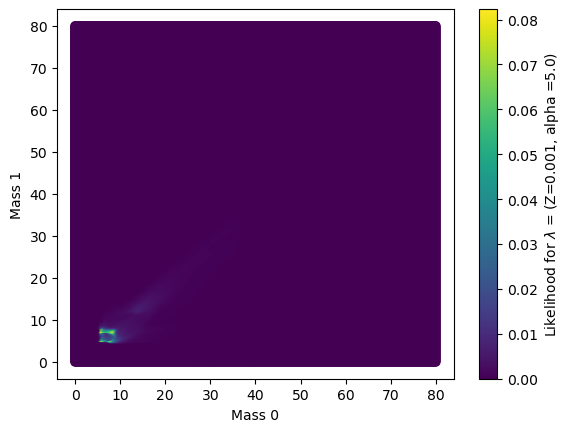

In [40]:
plot_likelihood(get_run(run_path), hyperparams=[0.001, 5])

### Exploring the conditional probibilty space

In [4]:
from tools.constants import full_data_path
import numpy as np
df = pd.read_parquet(full_data_path)
Zs= df['Z'].unique()
alphas  = df['alpha'].unique()
SEVN_grid = np.meshgrid(Zs,alphas)
df

,Mass_0,Mass_1,Z,alpha
0,29.804870,18.601870,0.0001,0.5
1,20.484050,16.858310,0.0001,0.5
2,36.202330,37.315660,0.0001,0.5
3,20.964950,22.923960,0.0001,0.5
4,15.490630,12.068660,0.0001,0.5
...,...,...,...,...
801033,9.356520,8.156447,0.0300,5.0
801034,10.859560,8.572336,0.0300,5.0
801035,10.656350,6.308559,0.0300,5.0
801036,9.010068,6.504719,0.0300,5.0


In [5]:
Zs, alphas

(array([0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.002 , 0.004 ,
        0.006 , 0.008 , 0.01  , 0.014 , 0.017 , 0.02  , 0.03  ]),
 array([0.5, 1. , 3. , 5. ]))

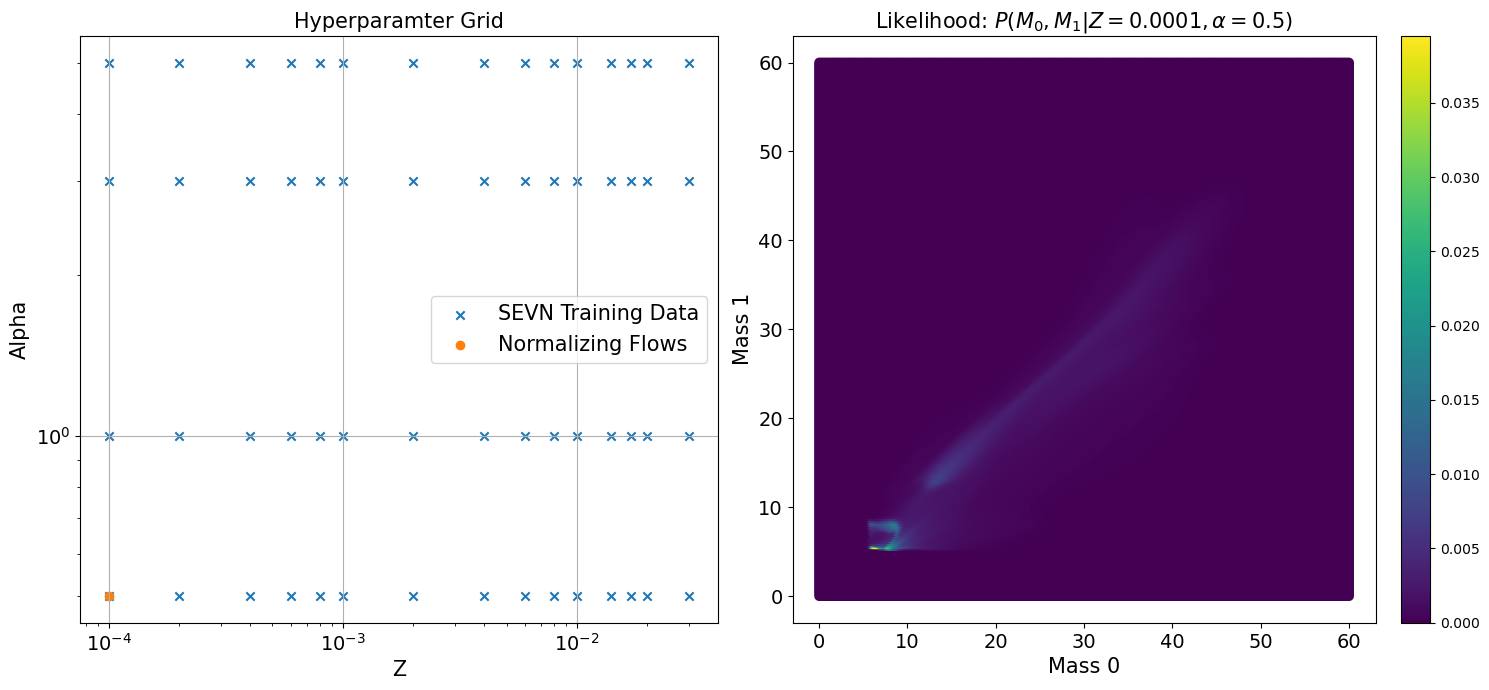

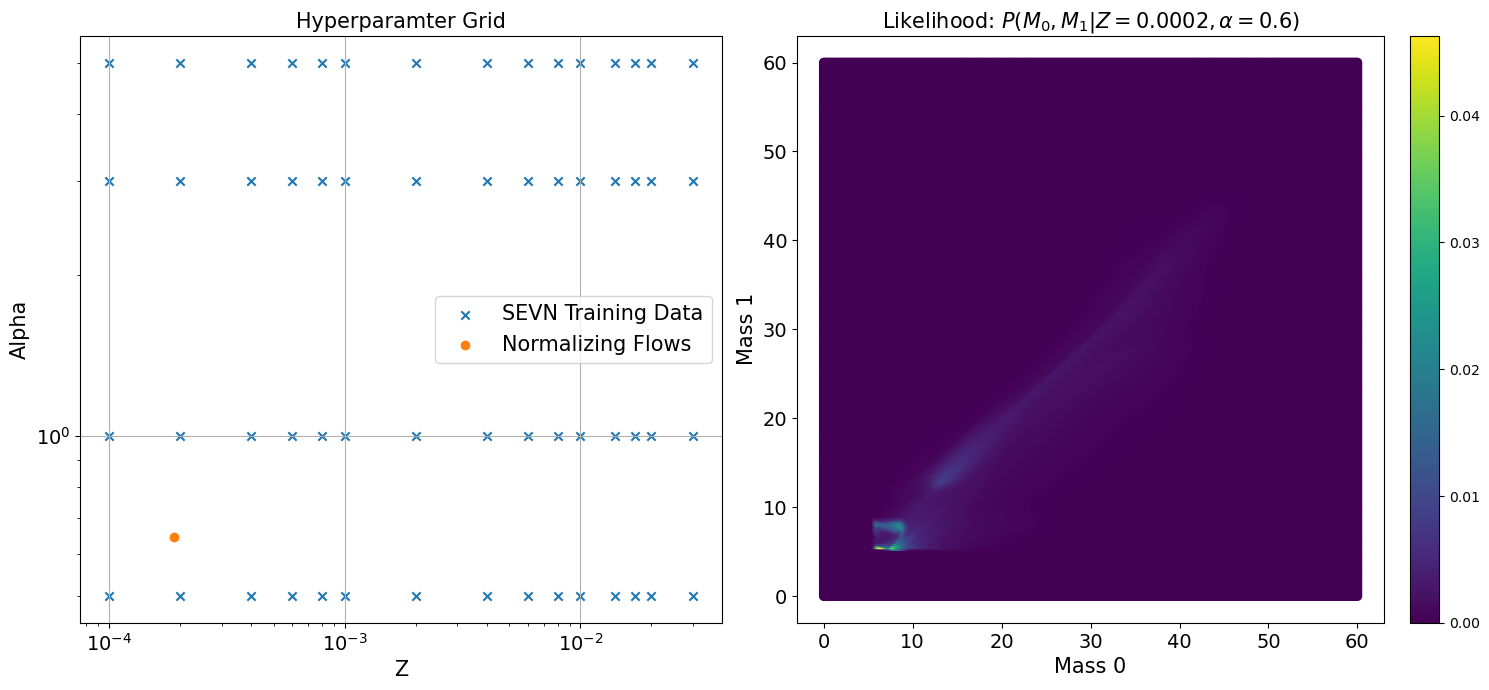

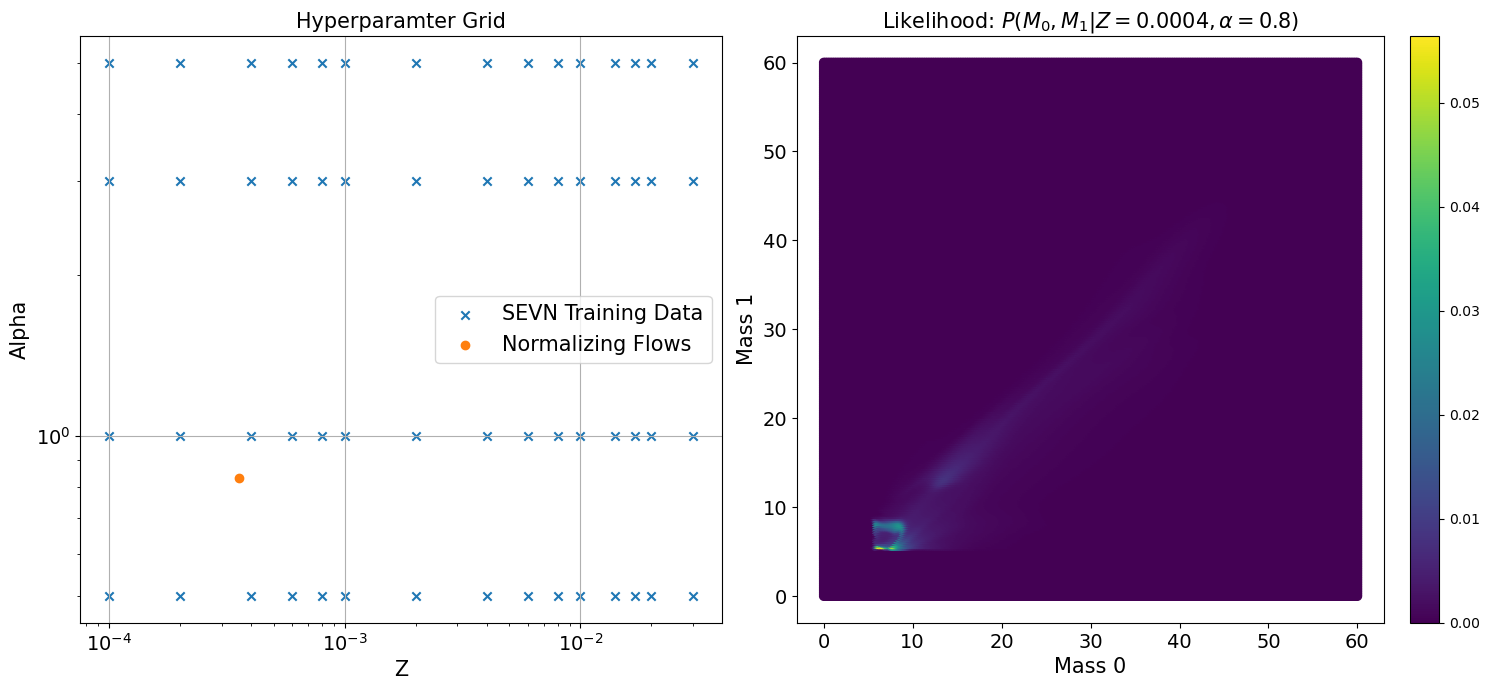

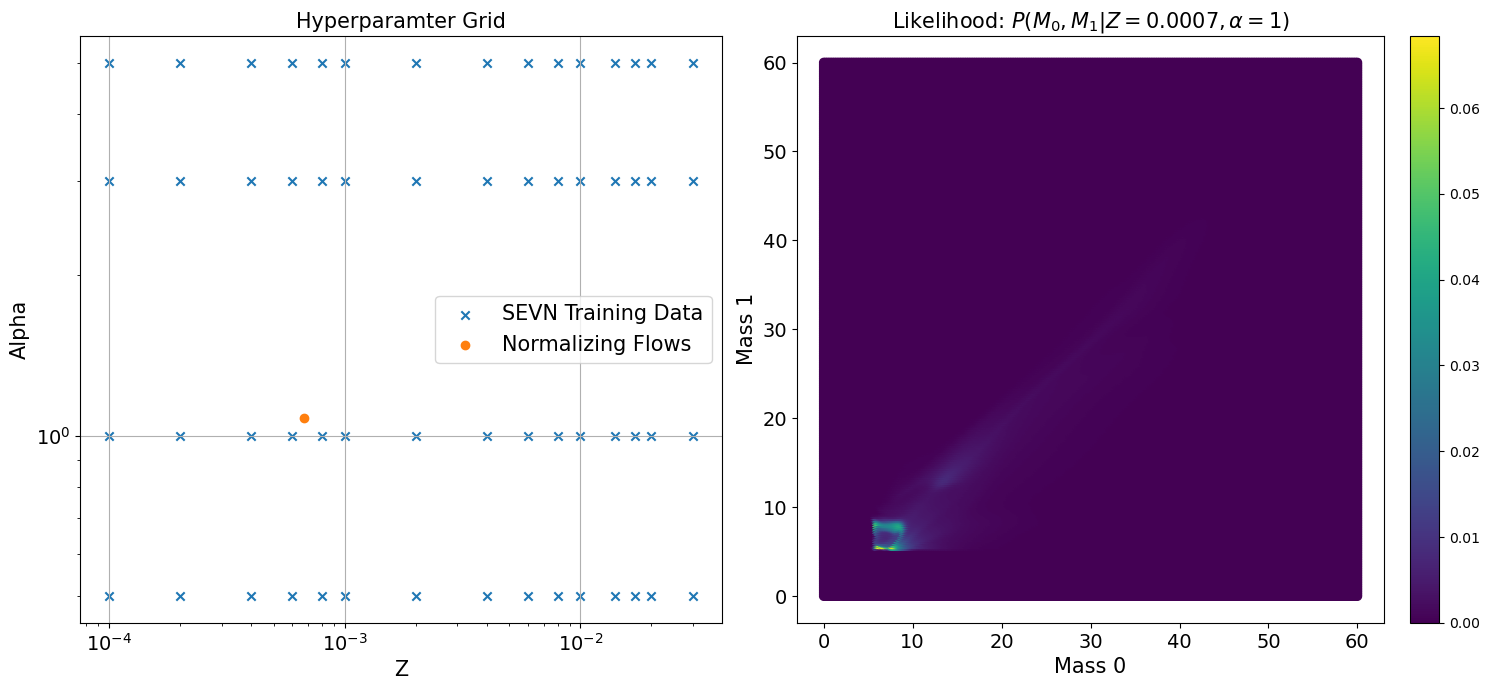

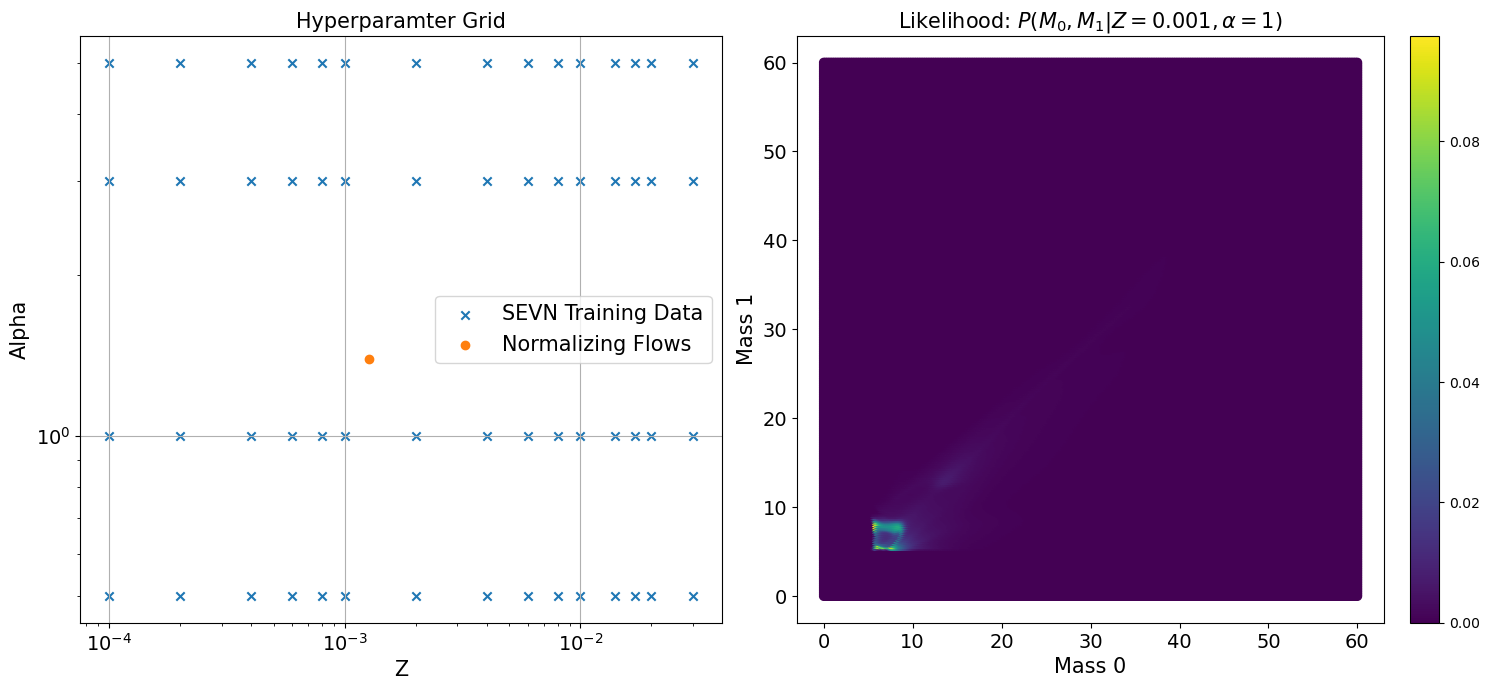

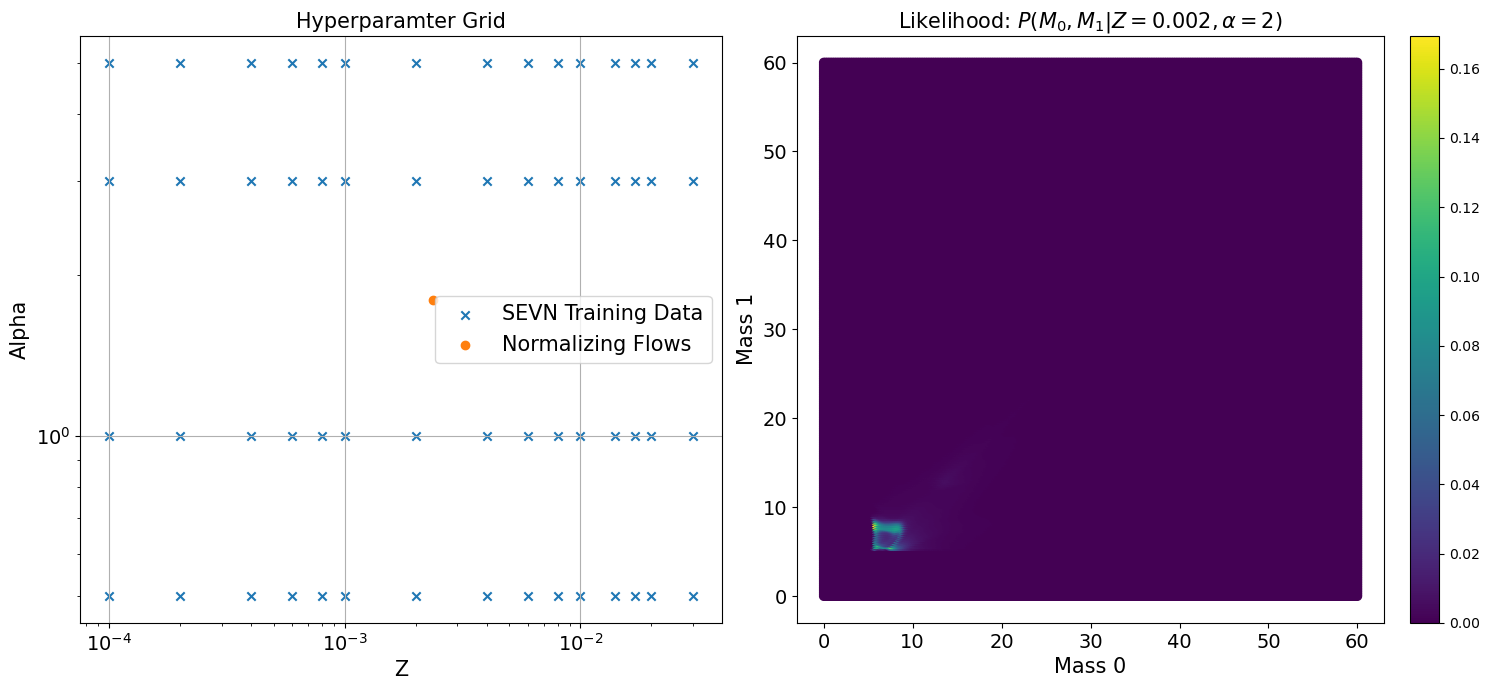

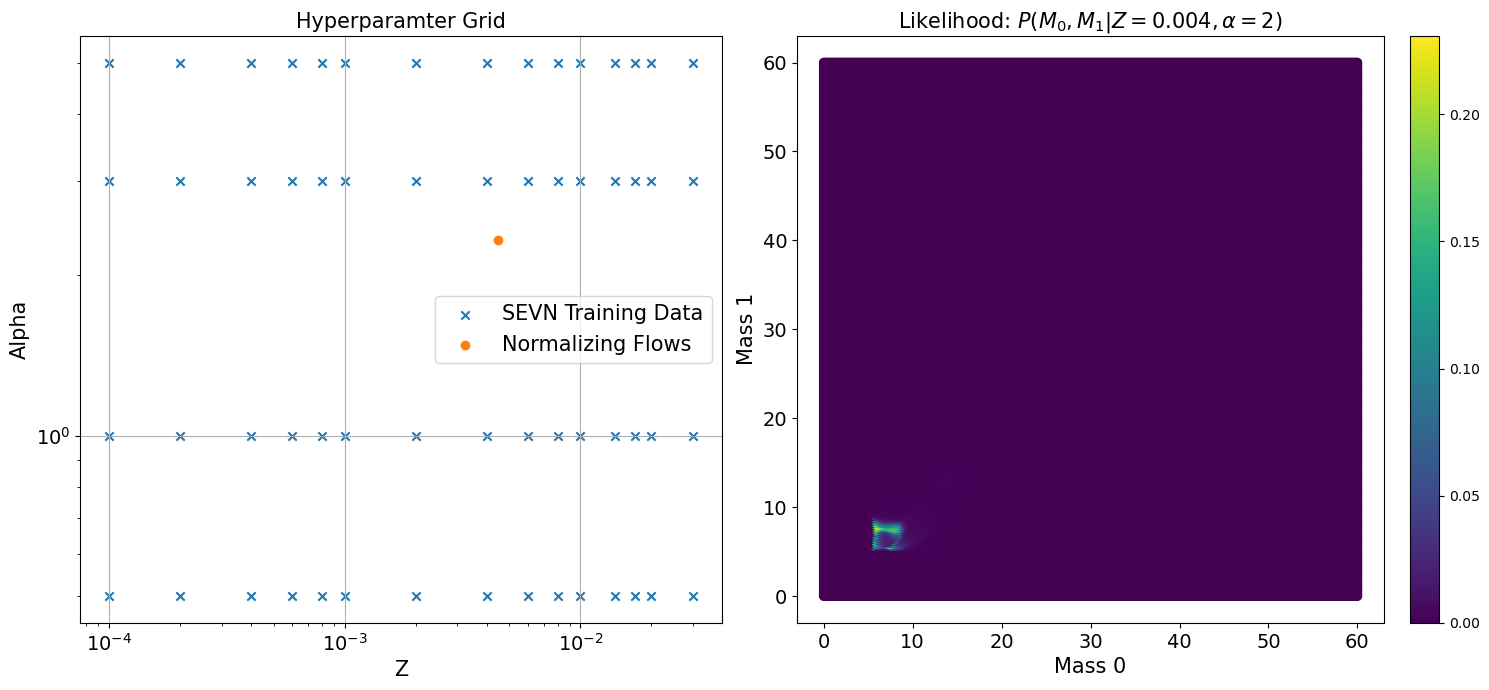

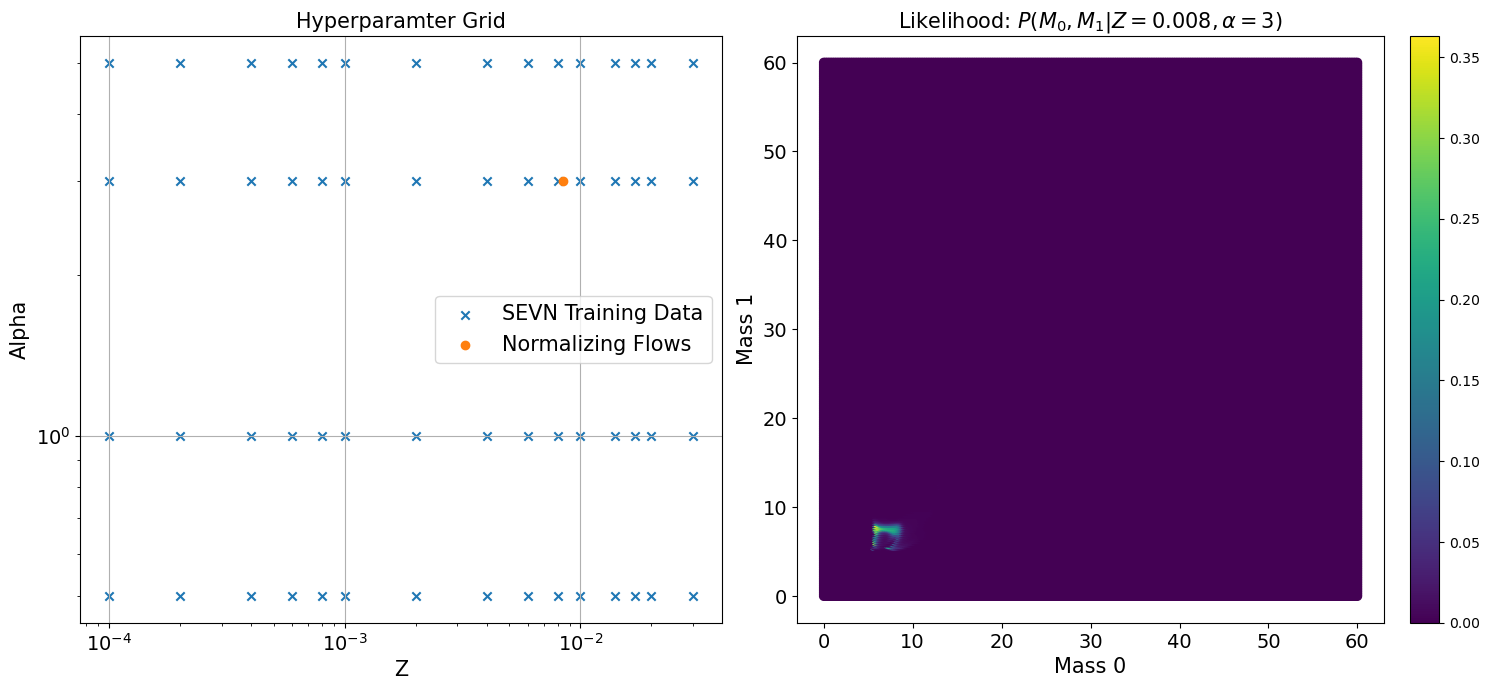

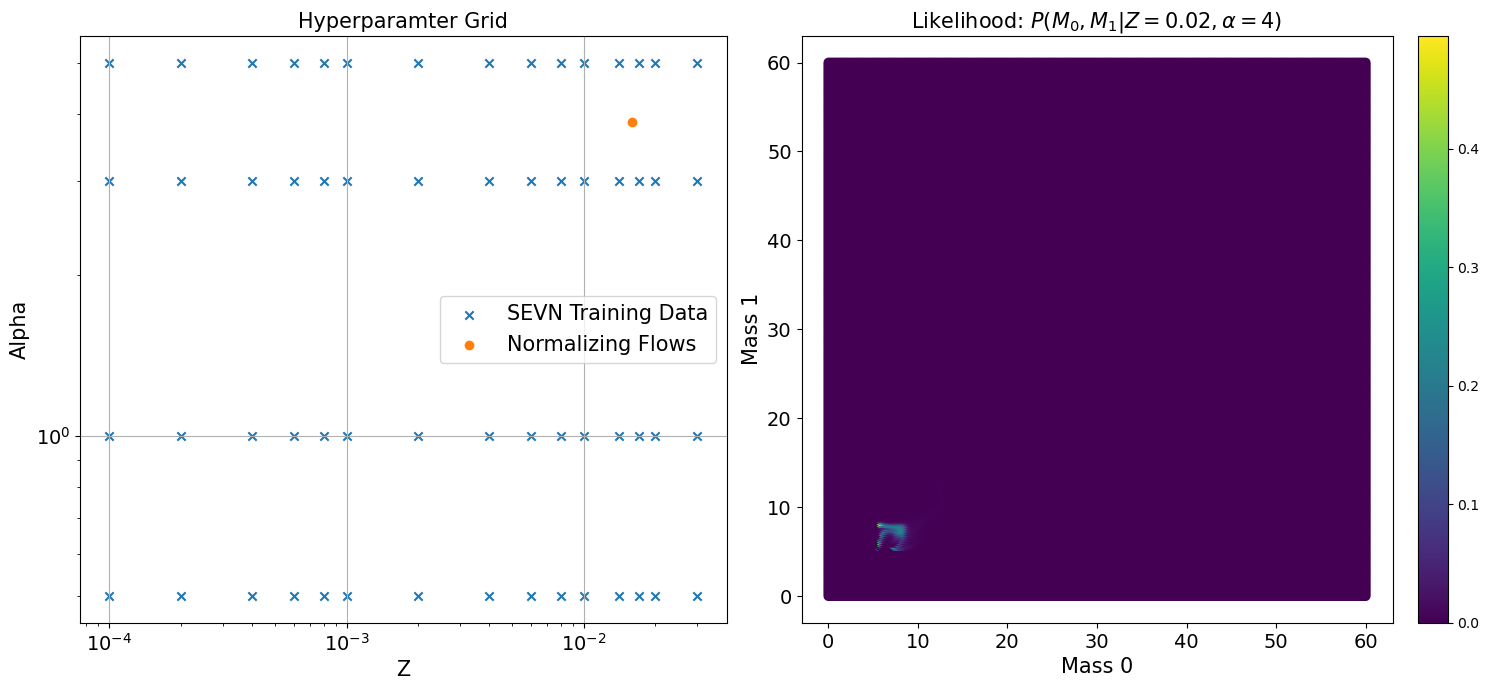

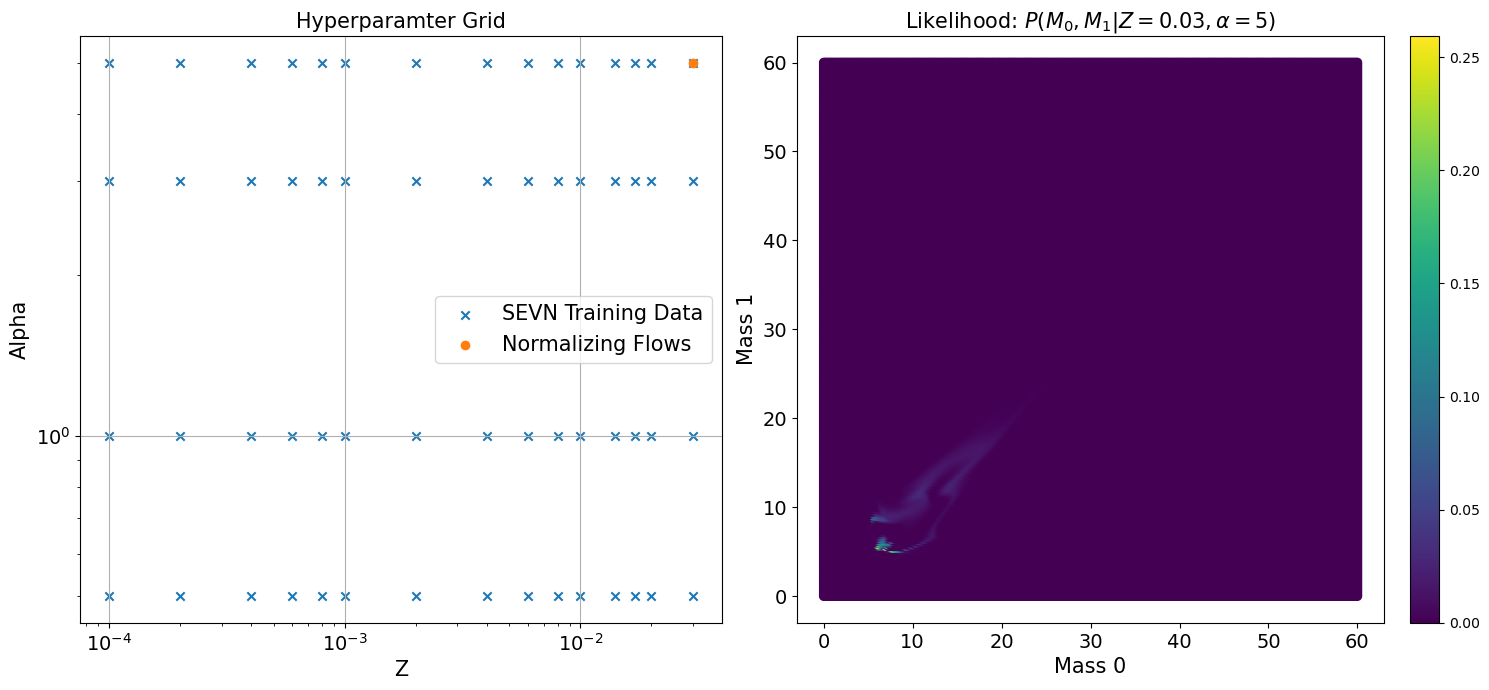

In [7]:
import matplotlib.pyplot as plt

Zs_= np.geomspace(0.0001, 0.03, 10)
alphas_ = np.geomspace(0.5, 5, 10)

i=1
for Z, alpha in zip(Zs_, alphas_):
    fig, ax = plt.subplots(figsize=(15,7), ncols=2)
    ax[0].scatter(SEVN_grid[0], SEVN_grid[1], marker ='x', label ='SEVN Training Data')
    ax[0].set_title("Hyperparamter Grid",  fontsize=15)
    ax[0].set_xlabel("Z", fontsize=15)
    ax[0].set_ylabel("Alpha", fontsize=15)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].tick_params(axis='both', labelsize=14)
    ax[0].grid(True)
    ax[0].scatter(Z,alpha, label='Normalizing Flows')
    ax[0].legend(fontsize=15)

    plot_likelihood(get_run(run_path), hyperparams=[Z, alpha], existing_ax=ax[1])
    ax[1].set_title(f'Likelihood: $P(M_0,M_1|Z={Z:.1g},\\alpha={alpha:.1g})$',  fontsize=15)
    plt.tight_layout()
    plt.savefig(f'../param_likelihood/{i}.png')
    plt.show()
    i+=1
